In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pdf page 92

In [10]:
train_df = pd.read_csv('WineData.csv')
train_df["style"] = train_df["style"].replace({'red':1, 'white':0})

train_df.head()
train_df.info()
train_df.shape
train_df.describe()
train_df.columns
train_df.index
train_df.isnull().any()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5198 non-null   float64
 1   volatile_acidity      5198 non-null   float64
 2   citric_acid           5198 non-null   float64
 3   residual_sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free_sulfur_dioxide   5198 non-null   float64
 6   total_sulfur_dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  quality               5198 non-null   int64  
 12  style                 5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB


(5198, 13)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,7.211822,0.341832,0.318407,5.430002,0.056185,30.403424,115.306368,0.994694,3.219575,0.531010,10.499345,5.812235,0.248942
std,1.293317,0.166658,0.146047,4.764607,0.034608,17.700964,56.320915,0.003005,0.160080,0.147835,1.190937,0.877392,0.432442
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992380,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994870,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,155.000000,0.996920,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.330000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

RangeIndex(start=0, stop=5198, step=1)

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
style                   False
dtype: bool

In [11]:
test_df = pd.read_csv('WineHoldoutData.csv')
test_df["style"] = test_df["style"].replace({'red':1, 'white':0})
test_df.head()
test_df.info()
test_df.shape
test_df.describe()
test_df.columns
test_df.index
test_df.isnull().any()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6,1
1,6.1,0.340,0.29,2.2,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,0
2,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5,1
3,6.9,0.250,0.34,1.3,0.035,27.0,82.0,0.99045,3.18,0.44,12.2,6,0
4,6.2,0.250,0.25,1.4,0.030,35.0,105.0,0.99120,3.30,0.44,11.1,7,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1299 non-null   float64
 1   volatile_acidity      1299 non-null   float64
 2   citric_acid           1299 non-null   float64
 3   residual_sugar        1299 non-null   float64
 4   chlorides             1299 non-null   float64
 5   free_sulfur_dioxide   1299 non-null   float64
 6   total_sulfur_dioxide  1299 non-null   float64
 7   density               1299 non-null   float64
 8   pH                    1299 non-null   float64
 9   sulphates             1299 non-null   float64
 10  alcohol               1299 non-null   float64
 11  quality               1299 non-null   int64  
 12  style                 1299 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 132.1 KB


(1299, 13)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,7.229253,0.330997,0.319538,5.496189,0.055427,31.013087,117.498075,0.994706,3.214203,0.532302,10.461611,5.842956,0.234796
std,1.309238,0.156045,0.142414,4.731941,0.036696,17.940489,57.307249,0.002974,0.163580,0.152684,1.199775,0.856392,0.424034
min,4.200000,0.100000,0.000000,0.800000,0.012000,3.000000,8.000000,0.987420,2.720000,0.270000,8.400000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992200,3.100000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994980,3.200000,0.510000,10.200000,6.000000,0.000000
75%,7.700000,0.390000,0.390000,8.200000,0.061000,43.000000,159.000000,0.997085,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.600000,1.580000,1.230000,20.800000,0.611000,118.500000,366.500000,1.003690,3.800000,1.950000,14.050000,8.000000,1.000000


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

RangeIndex(start=0, stop=1299, step=1)

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
style                   False
dtype: bool

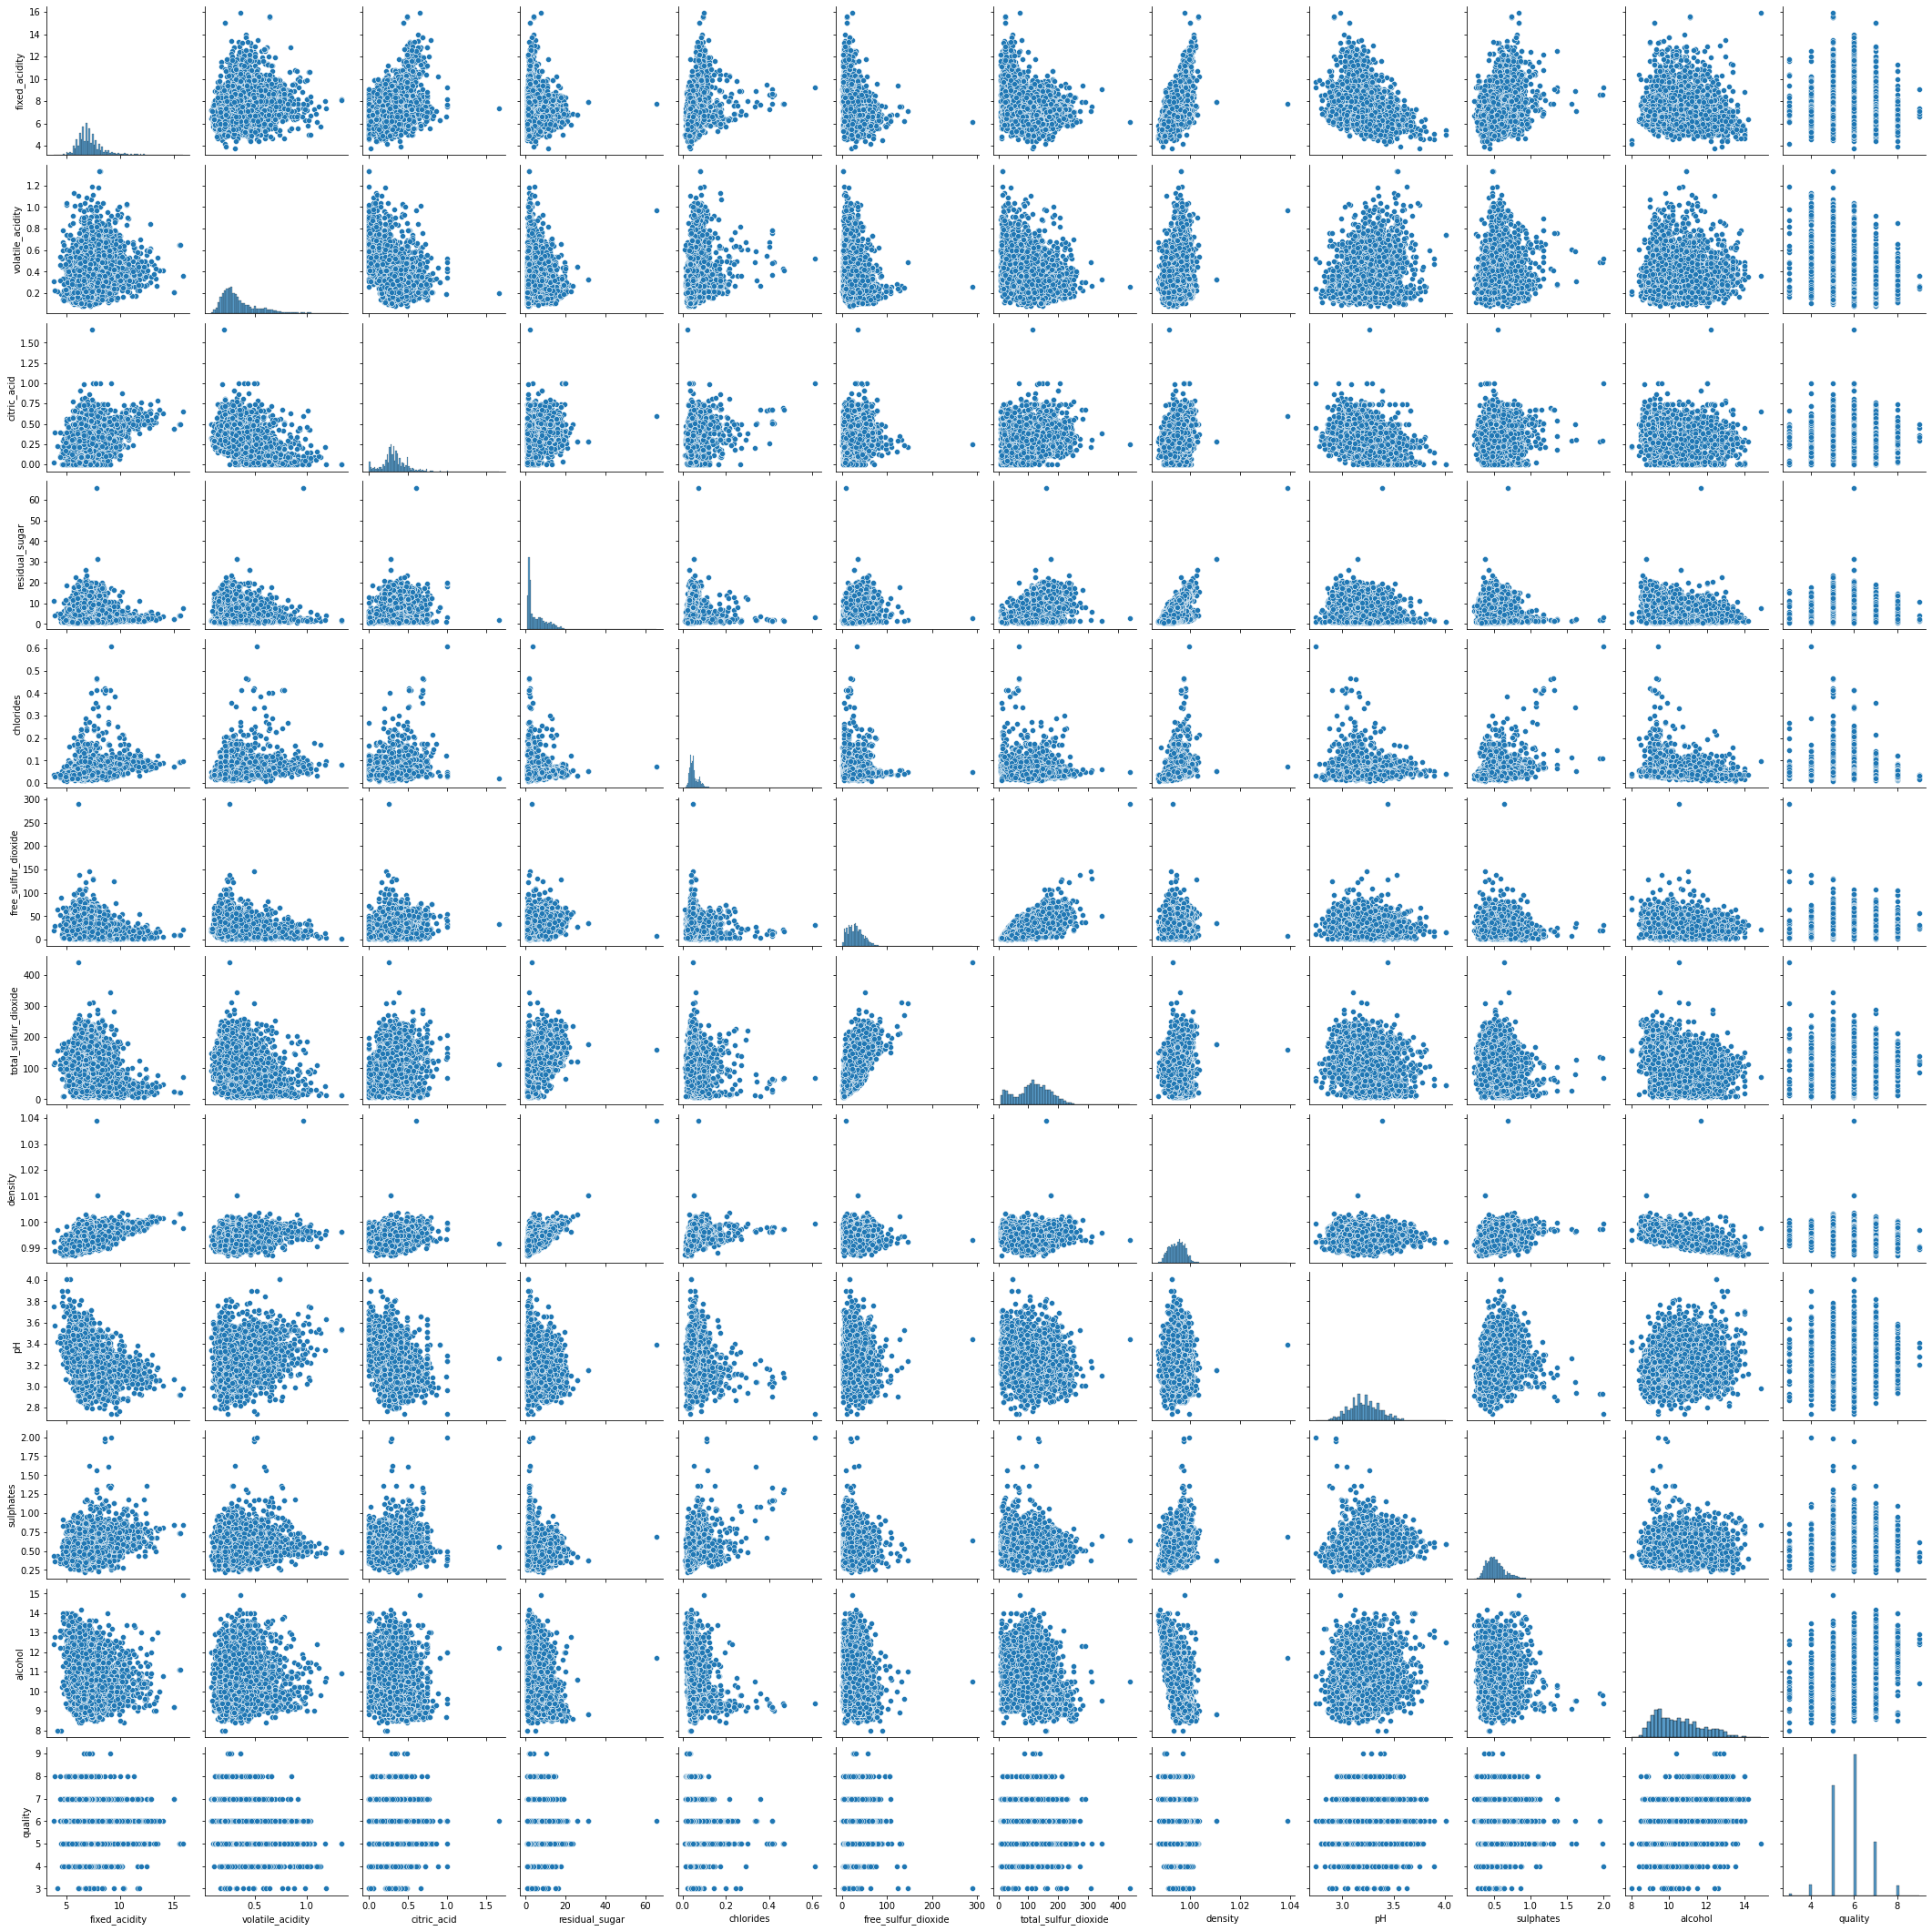

In [7]:
sns.pairplot(train_df)

In [12]:
X_train = train_df.loc[:,~train_df.columns.isin(['quality'])]
y_train = train_df.loc[:,"quality"]
X_test = test_df.loc[:,~test_df.columns.isin(['quality'])]
y_test = test_df.loc[:,"quality"]


## Multiple Linear Regression Model

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
n_samples = len(y_train)
n_features = X_train.shape[1]
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
r2_train = reg.score(X_train, y_train)
r2_test = r2_score(y_test, y_test_pred)
adjusted_r2_train = 1 - ((1 - r2_train) * (n_samples - 1)) / (n_samples - n_features - 1)
adjusted_r2_test = 1 - ((1 - r2_test) * (n_samples - 1)) / (n_samples - n_features - 1)
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
rss_train = np.sum(residuals_train**2)
rss_test = np.sum(residuals_test**2)
rse_train = np.sqrt(rss_train/(n_samples-n_features-1))
rse_test = np.sqrt(rss_test/(n_samples-n_features-1))
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
#reg.get_params()


LinearRegression()

In [ ]:
print("Reg Coefficients: \n", reg.coef_)
print("Reg Intercept: %.4f" % reg.intercept_)
print("\n")

print("Train r2 Score: %.4f" % r2_train)
print("Train Adj-r2 Score: %.4f" % adjusted_r2_train)
print("Train RSS: %.4f" % rss_train)
print("Train RSE: %.4f" % rse_train)
print("Train Mean squared error: %.4f" % mse_train)
print("Train Root Mean Squared Error: %.4f" % rmse_train)
print("\n")

print("Test r2 Score: %.4f" % r2_test)
print("Test Adj-r2 Score: %.4f" % adjusted_r2_test)
print("Test RSS: %.4f" % rss_test)
print("Test RSE: %.4f" % rse_test)
print("Test Mean squared error: %.4f" % mse_test)
print("Test Root Mean Squared Error: %.4f" % rmse_test)
print("Explained Variance Score: %.4f" % explained_variance_score(y_test, y_test_pred))

Reg Coefficients: 
 [ 9.02628676e-02 -1.46453533e+00 -3.01139999e-02  6.72372888e-02
 -6.32238909e-01  4.31301064e-03 -1.34398786e-03 -1.09735898e+02
  5.81039604e-01  7.29028480e-01  2.23976467e-01  3.60311240e-01]
Reg Intercept: 109.8203


Train r2 Score: 0.3020
Train Adj-r2 Score: 0.3004
Train RSS: 2792.6510
Train RSE: 0.7339
Train Mean squared error: 0.5373
Train Root Mean Squared Error: 0.7330


Test r2 Score: 0.2710
Test Adj-r2 Score: 0.2693
Test RSS: 693.9705
Test RSE: 0.3658
Test Mean squared error: 0.5342
Test Root Mean Squared Error: 0.7309
Explained Variance Score: 0.2719


In [ ]:
predictor_variables = train_df.columns.drop('quality')
formula = 'quality ~ ' + ' + '.join(predictor_variables)
lm_fit = smf.ols(formula, data= train_df).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     186.9
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        18:27:21   Log-Likelihood:                -5760.9
No. Observations:                5198   AIC:                         1.155e+04
Df Residuals:                    5185   BIC:                         1.163e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.8203 

In [ ]:
X_forvif = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Variable"] = X_forvif.columns
vif["VIF"] = [variance_inflation_factor(X_forvif.values, i) for i in range(X_forvif.shape[1])]
print(vif)

                Variable           VIF
0                  const  2.353080e+06
1          fixed_acidity  5.079728e+00
2       volatile_acidity  2.166300e+00
3            citric_acid  1.625494e+00
4         residual_sugar  9.613386e+00
5              chlorides  1.670534e+00
6    free_sulfur_dioxide  2.238319e+00
7   total_sulfur_dioxide  4.058120e+00
8                density  2.196333e+01
9                     pH  2.575926e+00
10             sulphates  1.548416e+00
11               alcohol  5.486312e+00
12                 style  7.063801e+00


In [ ]:
corr_matrix = train_df.corr()
print(corr_matrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.215999     0.316851   
volatile_acidity           0.215999          1.000000    -0.383380   
citric_acid                0.316851         -0.383380     1.000000   
residual_sugar            -0.115991         -0.191435     0.143820   
chlorides                  0.299044          0.380983     0.040924   
free_sulfur_dioxide       -0.281582         -0.351397     0.134709   
total_sulfur_dioxide      -0.334398         -0.414533     0.196411   
density                    0.454993          0.274774     0.090671   
pH                        -0.256139          0.266887    -0.327915   
sulphates                  0.299032          0.228641     0.051192   
alcohol                   -0.090438         -0.040370    -0.003290   
quality                   -0.077360         -0.265020     0.091517   
style                      0.482282          0.652543    -0.197055   

                   

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

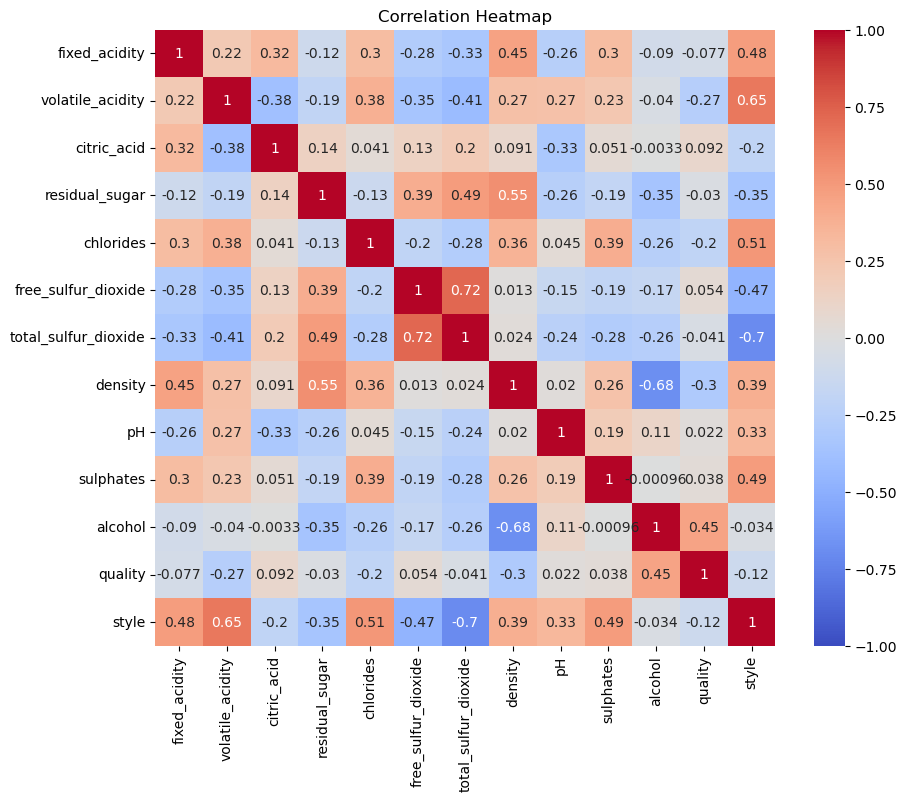

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()